In [310]:
# Prophet model for time series forecast
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

pd.Series(dtype='float64')

Series([], dtype: float64)

In [311]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [312]:
state = 'California'

## Baseline Prophet

In [313]:
df = pd.read_csv('feature_selection_top_states.csv')
df.rename(columns={'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'}, inplace=True)
df.rename(columns={'Date': 'ds'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,y,PROVINCE_STATE_NAME,STATE
0,2020-03-01,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
1,2020-03-02,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2,2020-03-03,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,7,California,0
3,2020-03-04,1.0,1.0,0.0,112.5,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.0,24.685185,1.860398,5.818187,1.716470,0.000000,10,California,0
4,2020-03-05,1.0,1.0,0.0,112.5,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.0,25.753086,1.860398,5.818187,1.716470,0.000000,12,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,2022-04-25,1.0,1.0,1.0,164.0,1.0,2.0,3.0,1.0,0.0,...,0.219948,5.0,26.817460,1.337448,5.387383,1.469608,0.695652,1243,Texas,1
7896,2022-04-26,1.0,1.0,1.0,156.0,1.0,2.0,3.0,1.0,0.0,...,0.221604,5.0,23.325397,1.337448,5.387383,1.469608,0.695893,2556,Texas,1
7897,2022-04-27,1.0,1.0,1.0,163.0,1.0,2.0,3.0,1.0,0.0,...,0.221844,5.0,24.674603,1.337448,5.387383,1.469608,0.696238,2513,Texas,1
7898,2022-04-28,1.0,1.0,1.0,149.0,1.0,2.0,3.0,1.0,0.0,...,0.222099,5.0,29.500000,1.337448,5.387383,1.469608,0.696478,2715,Texas,1


In [314]:
df_state = df[df['PROVINCE_STATE_NAME'] == state]

In [315]:
df_state

,ds,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,y,PROVINCE_STATE_NAME,STATE
0,2020-03-01,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
1,2020-03-02,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2,2020-03-03,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,7,California,0
3,2020-03-04,1.0,1.0,0.0,112.5,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.0,24.685185,1.860398,5.818187,1.716470,0.000000,10,California,0
4,2020-03-05,1.0,1.0,0.0,112.5,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.0,25.753086,1.860398,5.818187,1.716470,0.000000,12,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,...,0.363439,5.0,28.561111,1.894541,5.897176,1.830623,0.818862,4531,California,0
786,2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,...,0.363587,5.0,28.277778,1.894541,5.897176,1.830623,0.818984,16180,California,0
787,2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,...,0.363872,5.0,25.316667,1.894541,5.897176,1.830623,0.819211,1852,California,0
788,2022-04-28,1.0,1.0,1.0,125.0,2.0,2.0,3.0,0.0,0.0,...,0.364196,5.0,23.838889,1.894541,5.897176,1.830623,0.819452,2427,California,0


In [316]:
prophet_uni = df_state[['ds', 'y']]
prophet_uni = prophet_uni.sort_values(by='ds')
prophet_uni

,ds,y
0,2020-03-01,5
1,2020-03-02,5
2,2020-03-03,7
3,2020-03-04,10
4,2020-03-05,12
...,...,...
785,2022-04-25,4531
786,2022-04-26,16180
787,2022-04-27,1852
788,2022-04-28,2427


In [317]:
train = prophet_uni.iloc[:632]
test = prophet_uni.iloc[632:]

In [318]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()

# Fit the model on the training dataset
model_baseline.fit(train)

20:07:28 - cmdstanpy - INFO - Chain [1] start processing
20:07:28 - cmdstanpy - INFO - Chain [1] done processing


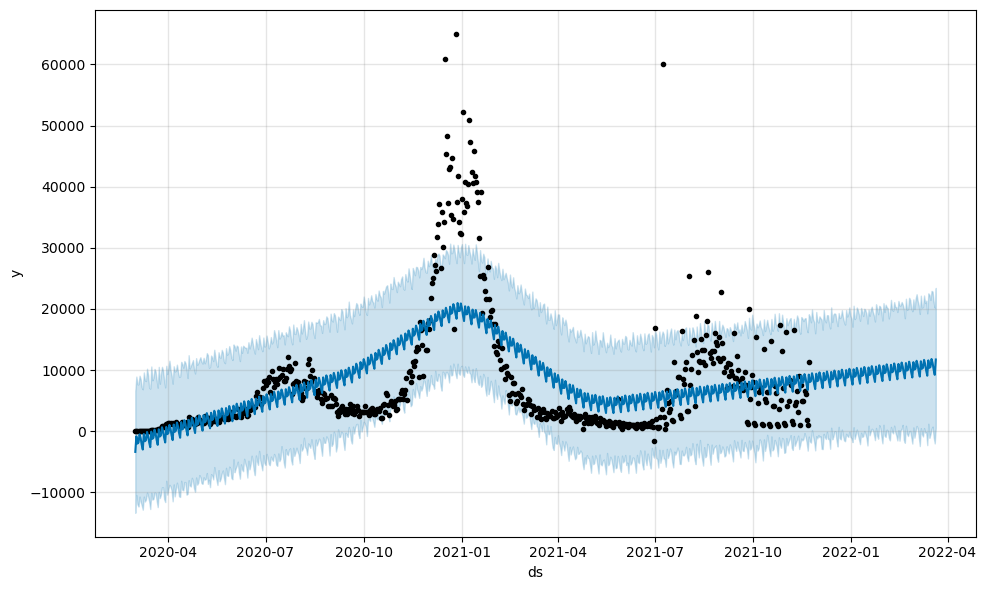

In [319]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=119)

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

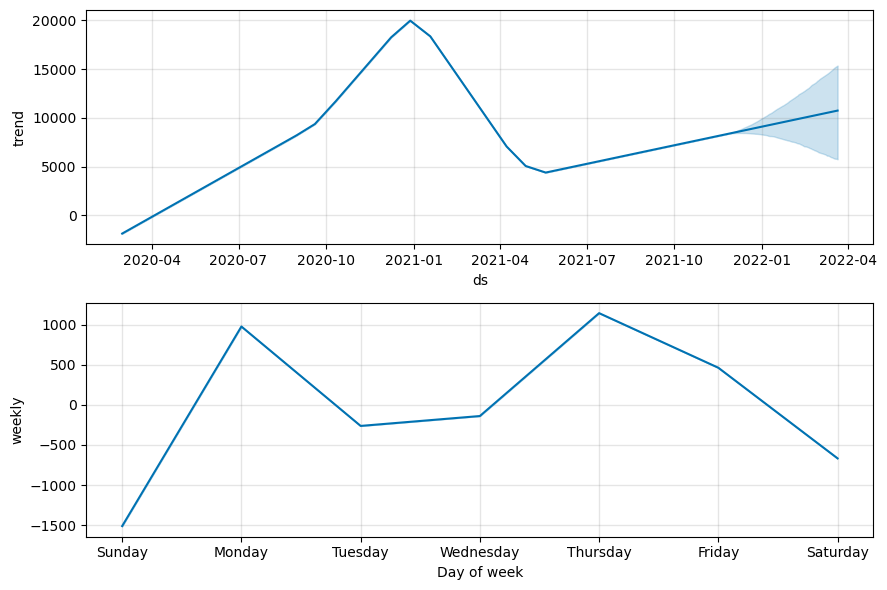

In [320]:
model_baseline.plot_components(forecast_baseline);


In [321]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-119:], on='ds')

# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')

model_rmse = mean_squared_error(performance_baseline['y'], performance_baseline['yhat'], squared=False)
print('Test RMSE: ', model_rmse)

actuals = performance_baseline['y']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = performance_baseline_MAE / mae_naive

print(f'Test MASE: {mase}')

The MAE for the baseline model is 29088.97081865796
Test RMSE:  54164.89965894655
Test MASE: 1.1892379057491367


## Add seasonality

In [322]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(train)

20:07:30 - cmdstanpy - INFO - Chain [1] start processing
20:07:30 - cmdstanpy - INFO - Chain [1] done processing


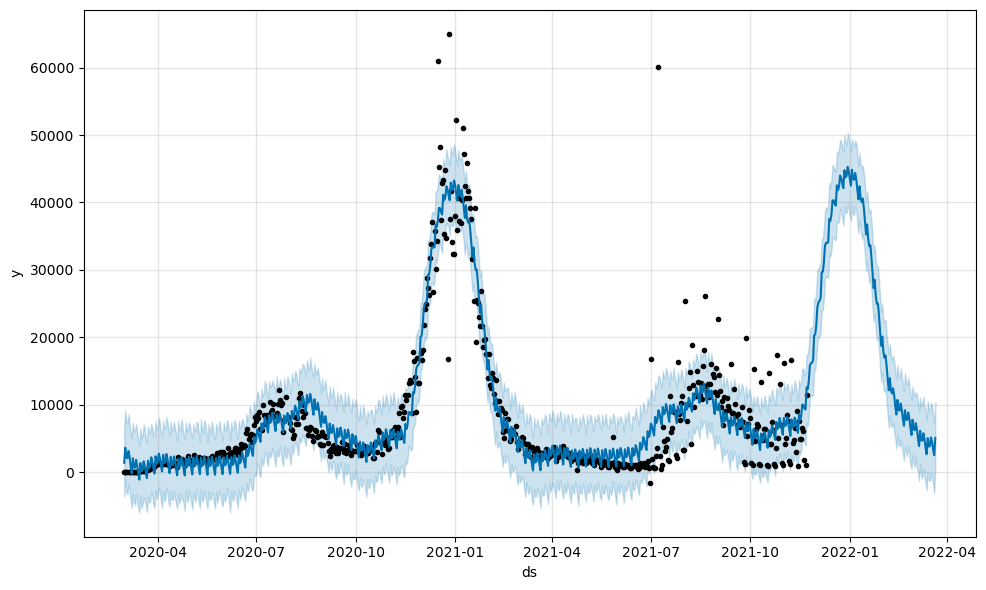

In [323]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=119)

# Make prediction
forecast_season = model_season.predict(future_season)

# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

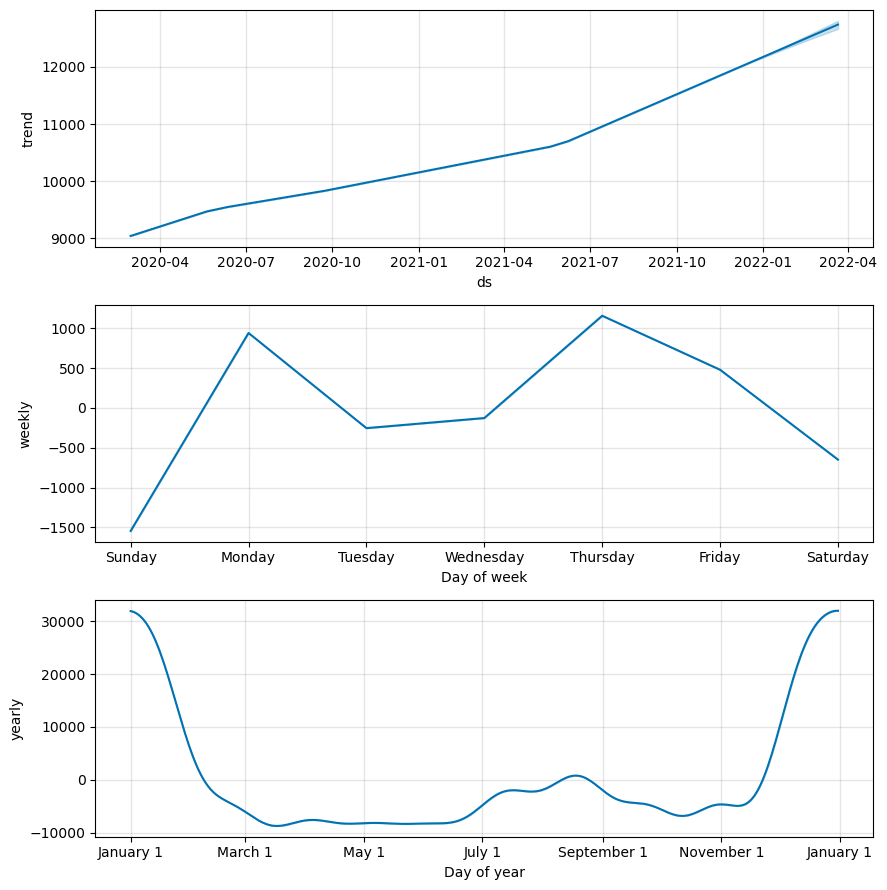

In [324]:
model_season.plot_components(forecast_season);

In [325]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-119:], on='ds')

# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')

model_rmse = mean_squared_error(performance_season['y'], performance_season['yhat'], squared=False)
print('Test RMSE: ', model_rmse)

actuals = performance_season['y']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = performance_season_MAE / mae_naive

print(f'Test MASE: {mase}')

The MAE for the seasonality model is 26725.035287199935
Test RMSE:  45852.396360176426
Test MASE: 1.0925936566870857


## Multivariate Prophet

In [326]:
df_state

,ds,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,y,PROVINCE_STATE_NAME,STATE
0,2020-03-01,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
1,2020-03-02,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2,2020-03-03,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,7,California,0
3,2020-03-04,1.0,1.0,0.0,112.5,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.0,24.685185,1.860398,5.818187,1.716470,0.000000,10,California,0
4,2020-03-05,1.0,1.0,0.0,112.5,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.0,25.753086,1.860398,5.818187,1.716470,0.000000,12,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,...,0.363439,5.0,28.561111,1.894541,5.897176,1.830623,0.818862,4531,California,0
786,2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,...,0.363587,5.0,28.277778,1.894541,5.897176,1.830623,0.818984,16180,California,0
787,2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,...,0.363872,5.0,25.316667,1.894541,5.897176,1.830623,0.819211,1852,California,0
788,2022-04-28,1.0,1.0,1.0,125.0,2.0,2.0,3.0,0.0,0.0,...,0.364196,5.0,23.838889,1.894541,5.897176,1.830623,0.819452,2427,California,0


In [327]:
train = df_state.iloc[:632]
test = df_state.iloc[632:]

# Removing rows with NaN values
train = train.dropna()
test = test.dropna()

In [328]:
test

,ds,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,y,PROVINCE_STATE_NAME,STATE
632,2021-11-23,2.0,2.0,1.0,855.0,2.0,2.0,3.0,1.0,0.0,...,0.173095,5.0,16.811111,1.869290,5.894258,1.764479,0.762084,4541,California,0
633,2021-11-24,2.0,2.0,1.0,869.0,2.0,2.0,3.0,1.0,0.0,...,0.172589,5.0,16.522222,1.869290,5.894258,1.764479,0.763534,4168,California,0
634,2021-11-25,2.0,2.0,1.0,860.0,2.0,2.0,3.0,1.0,0.0,...,0.176903,5.0,18.177778,1.869290,5.894258,1.764479,0.763534,2,California,0
635,2021-11-26,2.0,2.0,1.0,845.0,2.0,2.0,3.0,1.0,0.0,...,0.168839,5.0,18.400000,1.869290,5.894258,1.764479,0.763534,1990,California,0
636,2021-11-27,2.0,2.0,1.0,834.0,2.0,2.0,3.0,1.0,0.0,...,0.174211,5.0,19.488889,1.869290,5.894258,1.764479,0.763534,618,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,...,0.363439,5.0,28.561111,1.894541,5.897176,1.830623,0.818862,4531,California,0
786,2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,...,0.363587,5.0,28.277778,1.894541,5.897176,1.830623,0.818984,16180,California,0
787,2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,...,0.363872,5.0,25.316667,1.894541,5.897176,1.830623,0.819211,1852,California,0
788,2022-04-28,1.0,1.0,1.0,125.0,2.0,2.0,3.0,0.0,0.0,...,0.364196,5.0,23.838889,1.894541,5.897176,1.830623,0.819452,2427,California,0


In [329]:
columns = df_state.columns
predictors = ['contact_tracing', 'debt_relief',
       'restrictions_on_internal_movement', 'current_intensive_care_patients',
       'facial_coverings', 'public_information_campaigns', 'testing_policy',
       'income_support', 'public_transport_closing', 'new_cases_50_min',
       'Completeness_pct', 'new_cases_10_min', 'new_cases_100_min',
       'new_cases_30_lag', 'new_cases_2_lag', 'workplace_closing',
       'new_cases_3_lag', 'school_closing', 'international_travel_controls',
       'stay_at_home_requirements', 'new_cases_350_lag', 'new_cases_50_lag',
       'restrictions_on_gatherings', 'relative_humidity', 'new_cases_150_lag',
       'new_cases_1 lag', 'rainfall_mm', 'new_cases_4_lag',
       'cancel_public_events', 'new_cases_7_lag', 'new_hospitalized_patients',
       'personal_income', 'new_cases_50_mean', 'Vaccine_available',
       'new_cases_10_std', 'HISP_BLACK', 'new_cases_10_max',
       'new_cases_50_max', 'new_cases_100_max', 'new_cases_50_std',
       'new_cases_100_std', 'new_cases_100_mean', 'NATIVE_PEOPLES',
       'booster_rate', 'vaccination_policy', 'maximum_temperature_celsius',
       'prop_age85plus', 'prop_age6064', 'prop_age8084',
       'vaccination_rate_1dose']

In [330]:
model = Prophet(yearly_seasonality=True)
model.add_regressor('contact_tracing', standardize=False)
model.fit(train)

20:07:33 - cmdstanpy - INFO - Chain [1] start processing
20:07:33 - cmdstanpy - INFO - Chain [1] done processing


In [331]:
def train_prophet(features, train_data, test_data):
    # Initialize Prophet model
    model = Prophet(yearly_seasonality=True)
    
    # Add each feature in the current set as a regressor
    for feature in features:
        model.add_regressor(feature, standardize=False)
    
    # Fit the model on the training data
    model.fit(train_data)
    
    return model

In [332]:
train_prophet(predictors, train, test)

20:07:34 - cmdstanpy - INFO - Chain [1] start processing
20:07:34 - cmdstanpy - INFO - Chain [1] done processing
20:07:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:07:34 - cmdstanpy - INFO - Chain [1] start processing
20:07:45 - cmdstanpy - INFO - Chain [1] done processing


In [333]:
future = model.make_future_dataframe(periods=len(test), include_history=False)

predictors_with_ds = predictors + ['ds']

future = pd.merge(future, df_state[predictors_with_ds], on='ds', how='inner')
future = future.fillna(method='ffill')
future

,ds,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,new_cases_100_std,new_cases_100_mean,NATIVE_PEOPLES,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose
0,2021-11-23,2.0,2.0,1.0,855.0,2.0,2.0,3.0,1.0,0.0,...,5307.595081,8363.43,873852,0.173095,5.0,16.811111,1.869290,5.894258,1.764479,0.762084
1,2021-11-24,2.0,2.0,1.0,869.0,2.0,2.0,3.0,1.0,0.0,...,5301.031759,8272.82,873852,0.172589,5.0,16.522222,1.869290,5.894258,1.764479,0.763534
2,2021-11-25,2.0,2.0,1.0,860.0,2.0,2.0,3.0,1.0,0.0,...,5358.184605,8163.83,873852,0.176903,5.0,18.177778,1.869290,5.894258,1.764479,0.763534
3,2021-11-26,2.0,2.0,1.0,845.0,2.0,2.0,3.0,1.0,0.0,...,5338.699955,8026.68,873852,0.168839,5.0,18.400000,1.869290,5.894258,1.764479,0.763534
4,2021-11-27,2.0,2.0,1.0,834.0,2.0,2.0,3.0,1.0,0.0,...,5292.078765,7852.14,873852,0.174211,5.0,19.488889,1.869290,5.894258,1.764479,0.763534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,...,42391.934228,23233.58,876556,0.363439,5.0,28.561111,1.894541,5.897176,1.830623,0.818862
154,2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,...,42339.847317,22944.34,876556,0.363587,5.0,28.277778,1.894541,5.897176,1.830623,0.818984
155,2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,...,37351.458854,20750.51,876556,0.363872,5.0,25.316667,1.894541,5.897176,1.830623,0.819211
156,2022-04-28,1.0,1.0,1.0,125.0,2.0,2.0,3.0,0.0,0.0,...,37000.723246,20031.94,876556,0.364196,5.0,23.838889,1.894541,5.897176,1.830623,0.819452


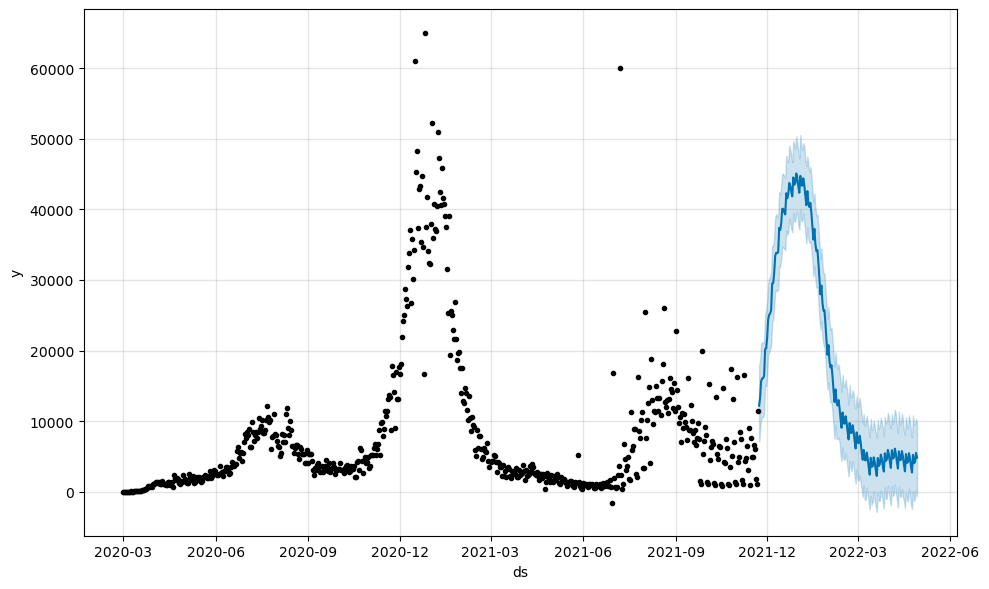

In [334]:
forecast_multivariate = model.predict(future)

# Visualize the forecast
model.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

In [335]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-len(test):], on='ds')

# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')

model_rmse = mean_squared_error(performance_multivariate['y'], performance_multivariate['yhat'], squared=False)
print('Test RMSE: ', model_rmse)

actuals = performance_multivariate['y']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = performance_multivariate_MAE / mae_naive

print(f'Test MASE: {mase}')

The MAE for the multivariate model is 20943.953269796326
Test RMSE:  39687.80251146084
Test MASE: 1.0636321349197209


## Feature selection

In [336]:
df_state = df_state.rename(columns={'ds': 'Date'})
df_state

,Date,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,y,PROVINCE_STATE_NAME,STATE
0,2020-03-01,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
1,2020-03-02,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2,2020-03-03,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,7,California,0
3,2020-03-04,1.0,1.0,0.0,112.5,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.0,24.685185,1.860398,5.818187,1.716470,0.000000,10,California,0
4,2020-03-05,1.0,1.0,0.0,112.5,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.0,25.753086,1.860398,5.818187,1.716470,0.000000,12,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,...,0.363439,5.0,28.561111,1.894541,5.897176,1.830623,0.818862,4531,California,0
786,2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,...,0.363587,5.0,28.277778,1.894541,5.897176,1.830623,0.818984,16180,California,0
787,2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,...,0.363872,5.0,25.316667,1.894541,5.897176,1.830623,0.819211,1852,California,0
788,2022-04-28,1.0,1.0,1.0,125.0,2.0,2.0,3.0,0.0,0.0,...,0.364196,5.0,23.838889,1.894541,5.897176,1.830623,0.819452,2427,California,0


In [337]:
df_state = df_state.sort_values(by='Date')

In [338]:
def forward_selection(train_df, test_df, y_train, y_test, target_column):
    train_df.columns = train_df.columns.astype(str)
    test_df.columns = test_df.columns.astype(str)

    features = [col for col in train_df.columns if col != 'Date']
    included_features = []
    best_mae = np.inf
    improvement = True
    
    while improvement and features:
        improvement = False
        for feature in features:
            test_features = included_features + [feature]
            
            # Initialize and setup Prophet model
            model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
            for f in test_features:
                model.add_regressor(f, standardize=False)
                
            # Prepare training data
            train_data = train_df[['Date'] + test_features]
            train_data['y'] = y_train
            train_data = train_data.rename(columns={'Date': 'ds'})
            
            model.fit(train_data)
            
            # Prepare testing data
            test_data = test_df[['Date'] + test_features]
            test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
            test_data = test_data.rename(columns={'Date': 'ds'})
            
            forecast = model.predict(test_data.drop(columns=['y']))
            
            # Evaluate the model
            mae = mean_absolute_error(y_test, forecast['yhat'])
            
            if mae < best_mae:
                best_feature = feature
                best_mae = mae
                improvement = True
                
        if improvement:
            included_features.append(best_feature)
            features.remove(best_feature)
            print(f"Added {best_feature} to the model, new best MAE: {best_mae}")
    
    print(f"Final features selected: {included_features}")
    return included_features

In [339]:
target_column = 'PEOPLE_POSITIVE_NEW_CASES_COUNT'

train = df_state.iloc[:632]
test = df_state.iloc[632:]

X_train = train.drop(columns=['y', 'PROVINCE_STATE_NAME','STATE'])
y_train = train['y']

X_test = test.drop(columns=['y', 'PROVINCE_STATE_NAME','STATE'])
y_test = test['y']

In [340]:
selected_features = forward_selection(X_train, X_test, y_train, y_test, target_column)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:07:46 - cmdstanpy - INFO - Chain [1] start processing
20:07:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:07:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:07:51 - cmdstanpy - INFO - Chain [1] start processing
20:07:51 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:07:54 - cmdstanpy - INFO - Chain [1] start processing
20:07:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:07:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:07:57 - cmdstanpy - INFO - Chain [1] start processing
20:07:57 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:08:16 - cmdstanpy - INFO - Chain [1] start processing
20:08:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:08:27 - cmdstanpy - INFO - Chain [1] start processing
20:08:27 - cmdstanpy - INFO - Chain [1] done processing
20:08:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:08:28 - cmdstanpy - INFO - Chain [1] start processing
20:08:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Added new_cases_7_lag to the model, new best MAE: 17504.819013574666


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:08:46 - cmdstanpy - INFO - Chain [1] start processing
20:08:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3x

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:08:50 - cmdstanpy - INFO - Chain [1] start processing
20:08:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:08:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:08:59 - cmdstanpy - INFO - Chain [1] start processing
20:08:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:09:26 - cmdstanpy - INFO - Chain [1] start processing
20:09:26 - cmdstanpy - INFO - Chain [1] done processing
20:09:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:09:26 - cmdstanpy - INFO - Chain [1] start processing
20:09:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

20:09:51 - cmdstanpy - INFO - Chain [1] start processing
20:09:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:09:52 - cmdstanpy - INF

Added new_cases_100_mean to the model, new best MAE: 12423.672430589939


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:09:55 - cmdstanpy - INFO - Chain [1] start processing
20:09:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3x

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:09:59 - cmdstanpy - INFO - Chain [1] start processing
20:09:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:10:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:02 - cmdstanpy - INFO - Chain [1] start processing
20:10:02 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:06 - cmdstanpy - INFO - Chain [1] start processing
20:10:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:10:33 - cmdstanpy - INFO - Chain [1] start processing
20:10:33 - cmdstanpy - INFO - Chain [1] done processing
20:10:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:10:33 - cmdstanpy - INFO - Chain [1] start processing
20:10:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

20:10:46 - cmdstanpy - INFO - Chain [1] start processing
20:10:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:46 - cmdstanpy - INF

Added maximum_temperature_celsius to the model, new best MAE: 12387.10630401026


20:10:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:49 - cmdstanpy - INFO - Chain [1] start processing
20:10:49 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:52 - cmdstanpy - INFO - Chain [1] start processing
20:10:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:10:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:10:56 - cmdstanpy - INFO - Chain [1] start processing
20:10:56 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:11:19 - cmdstanpy - INFO - Chain [1] start processing
20:11:19 - cmdstanpy - INFO - Chain [1] done processing
20:11:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:11:19 - cmdstanpy - INFO - Chain [1] start processing
20:11:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

20:11:38 - cmdstanpy - INFO - Chain [1] start processing
20:11:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:38 - cmdstanpy - INF

Added new_cases_1 lag to the model, new best MAE: 11950.72570347389


20:11:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:40 - cmdstanpy - INFO - Chain [1] start processing
20:11:40 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:44 - cmdstanpy - INFO - Chain [1] start processing
20:11:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:11:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:47 - cmdstanpy - INFO - Chain [1] start processing
20:11:48 - cmdstanpy - INF

20:11:51 - cmdstanpy - INFO - Chain [1] start processing
20:11:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:11:51 - cmdstanpy - INF

20:12:15 - cmdstanpy - INFO - Chain [1] start processing
20:12:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:15 - cmdstanpy - INF

20:12:22 - cmdstanpy - INFO - Chain [1] start processing
20:12:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:23 - cmdstanpy - INF

Added new_cases_3_lag to the model, new best MAE: 11518.19984022474


20:12:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:24 - cmdstanpy - INFO - Chain [1] start processing
20:12:24 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:28 - cmdstanpy - INFO - Chain [1] start processing
20:12:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:12:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:32 - cmdstanpy - INFO - Chain [1] start processing
20:12:32 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:36 - cmdstanpy - INFO - Chain [1] start processing
20:12:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:12:53 - cmdstanpy - INFO - Chain [1] start processing
20:12:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:13:00 - cmdstanpy - INFO - Chain [1] start processing
20:13:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:00 - cmdstanpy - INF

Added prop_age8084 to the model, new best MAE: 11510.169631717492


20:13:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:02 - cmdstanpy - INFO - Chain [1] start processing
20:13:02 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:06 - cmdstanpy - INFO - Chain [1] start processing
20:13:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:13:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:10 - cmdstanpy - INFO - Chain [1] start processing
20:13:10 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:14 - cmdstanpy - INFO - Chain [1] start processing
20:13:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:24 - cmdstanpy - INFO - Chain [1] start processing
20:13:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:13:30 - cmdstanpy - INFO - Chain [1] start processing
20:13:30 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:30 - cmdstanpy - INF

Added restrictions_on_internal_movement to the model, new best MAE: 11462.600705810384


20:13:31 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:31 - cmdstanpy - INFO - Chain [1] start processing
20:13:31 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:35 - cmdstanpy - INFO - Chain [1] start processing
20:13:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:13:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:41 - cmdstanpy - INFO - Chain [1] start processing
20:13:41 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:45 - cmdstanpy - INFO - Chain [1] start processing
20:13:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:13:56 - cmdstanpy - INFO - Chain [1] start processing
20:13:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:14:03 - cmdstanpy - INFO - Chain [1] start processing
20:14:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:03 - cmdstanpy - INF

Added vaccination_rate_1dose to the model, new best MAE: 11409.921170856698


20:14:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:04 - cmdstanpy - INFO - Chain [1] start processing
20:14:04 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:08 - cmdstanpy - INFO - Chain [1] start processing
20:14:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:14:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:13 - cmdstanpy - INFO - Chain [1] start processing
20:14:13 - cmdstanpy - INF

20:14:17 - cmdstanpy - INFO - Chain [1] start processing
20:14:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:18 - cmdstanpy - INF

20:14:30 - cmdstanpy - INFO - Chain [1] start processing
20:14:30 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:31 - cmdstanpy - INF

Added prop_age85plus to the model, new best MAE: 11406.619536447224


20:14:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:41 - cmdstanpy - INFO - Chain [1] start processing
20:14:41 - cmdstanpy - INF

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:45 - cmdstanpy - INFO - Chain [1] start processing
20:14:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3x

20:14:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:49 - cmdstanpy - INFO - Chain [1] start processing
20:14:49 - cmdstanpy - INF

20:14:54 - cmdstanpy - INFO - Chain [1] start processing
20:14:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:14:55 - cmdstanpy - INF

20:15:11 - cmdstanpy - INFO - Chain [1] start processing
20:15:11 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_test  # This line is not used for prediction but kept for consistency
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_14920/1110234621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = y_train
20:15:12 - cmdstanpy - INF

Final features selected: ['new_cases_7_lag', 'new_cases_100_mean', 'maximum_temperature_celsius', 'new_cases_1 lag', 'new_cases_3_lag', 'prop_age8084', 'restrictions_on_internal_movement', 'vaccination_rate_1dose', 'prop_age85plus']


In [341]:
predictors = ['new_cases_7_lag', 'new_cases_100_mean', 'maximum_temperature_celsius', 
              'new_cases_1 lag', 'new_cases_3_lag', 'prop_age8084', 
              'restrictions_on_internal_movement', 'vaccination_rate_1dose', 'prop_age85plus']

In [342]:
df_state = df_state.rename(columns={'Date': 'ds'})

train = df_state.iloc[:632]
test = df_state.iloc[632:]

# Removing rows with NaN values
train = train.dropna()
test = test.dropna()

model = train_prophet(predictors, train, test)
model

20:15:21 - cmdstanpy - INFO - Chain [1] start processing
20:15:21 - cmdstanpy - INFO - Chain [1] done processing


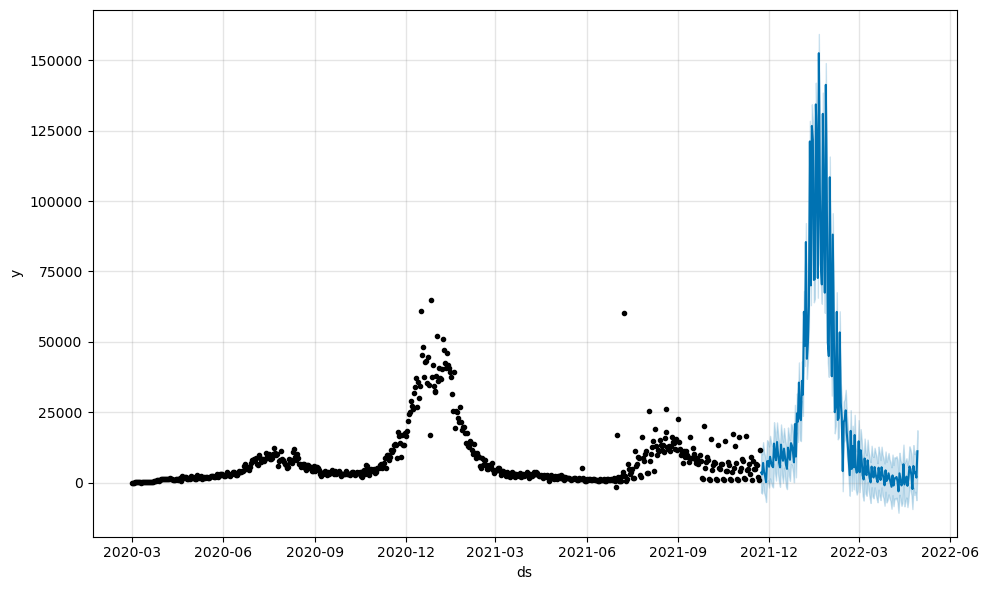

In [343]:
future = model.make_future_dataframe(periods=len(test), include_history=False)

predictors_with_ds = predictors + ['ds']

future = pd.merge(future, df_state[predictors_with_ds], on='ds', how='inner')
future = future.fillna(method='ffill')
future

forecast_multivariate = model.predict(future)

# Visualize the forecast
model.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

In [344]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-len(test):], on='ds')

# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')

model_rmse = mean_squared_error(performance_multivariate['y'], performance_multivariate['yhat'], squared=False)
print('Test RMSE: ', model_rmse)

actuals = performance_multivariate['y']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = performance_multivariate_MAE / mae_naive

print(f'Test MASE: {mase}')

The MAE for the multivariate model is 11406.619536447224
Test RMSE:  23174.737424298553
Test MASE: 0.5792816157236557
